In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import RandomNormal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples :", X_train.shape[0], 
      "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], 
      "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
# after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

#pixcels values are from 0-255, so divide each pixel by 255 (to noramalize)
X_train, X_test = X_train/255, X_test/255

#converting labels into one-hot encoded: there are 10 labels so new vector will be 10 dimensional
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("Class label of first image :", y_train[0])
print("After converting the output into a vector : ",Y_train[0])

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)
Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**NOTE:** I'll keep my activation function as '**ReLu**' for the hidden layer and **'softmax function'** for the output layer. I'll consider the same optimization **'Adam'** for all architecture.

# With 2-hidden layers (Model_2)

* There will be total 4-layer (2:hidden + 1:output + 1:input)

In [0]:
def plot_epoch_vs_loss(epochs, train_loss, test_loss):
    plt.figure(figsize = (10,8))
    plt.title('categorical_crossentropy loss vs #epcohs', fontsize = 14)
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('categorical_crossentropy', fontsize = 12)
    x = range(1, epochs+1)
    plt.plot(x, train_loss, label = 'Train')
    plt.plot(x, test_loss, label = 'Test')
    plt.xticks(range(1, epochs+1, 2))
    plt.legend(fontsize = 12)
    plt.show()
    
def report_model(model, history, X_test, Y_test, epochs):
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])
    print('\n\n')
    
    #plot the loss vs epochs
    test_loss = history.history['val_loss']
    train_loss = history.history['loss']
    plot_epoch_vs_loss(epochs, train_loss, test_loss)
    return score
    
def weight_plot(model, hidden_layers, name = ''):
    '''Returns the voilin plot of wieghts'''
    weights_after = model.get_weights()
    n = hidden_layers+1
    fig, axs = plt.subplots(1, n, figsize = (19, 8))
    if (name == '') | (name == 'drop'):
        k = 2
    elif name == 'BN':
        k = 6
    else:
        k = 6
    for i, ax in enumerate(axs):
        #to change the color of each voilin: https://stackoverflow.com/a/52656676/12005970
        sns.violinplot(y = weights_after[i*k].flatten().reshape(-1,1), color = 'C'+str(i), ax = ax)
        ax.set_title('Trained Model Weights', fontsize = 14)
        if i+1 < n:
            ax.set_xlabel('Hidden Layer'+str(i+1), fontsize = 12)
        else:
            ax.set_xlabel('Output Layer', fontsize = 12)

#  http://zetcode.com/python/prettytable/           
x = PrettyTable()
x.field_names = ["Architecture", "Regularization", "Test Loss", "Test Accuracy"]

    
epochs     = 20
batch_size = 128 #2^7

In [0]:
n_inputs         = X_train.shape[1]
n_hidden_units_1 = 512
n_hidden_units_2 = 128
out_hidden_units = 10

**He Normal Initialzation**: With standard devation
\begin{align}
\sigma = \sqrt{\frac {2}{fan_{in}}} \\
\end{align}

## Simple (Fully Connected)

In [5]:
model_2 = Sequential()
model_2.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_2.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_2.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_2.summary()

#compile it
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_2.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

W0906 15:00:15.149598 140679911057280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 15:00:15.168732 140679911057280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 15:00:15.171540 140679911057280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0906 15:00:15.339908 140679911057280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 15:00:15.359177 140679911057280 deprecation_wrapper.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2303 - acc: 0.9337 - val_loss: 0.1081 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0848 - acc: 0.9741 - val_loss: 0.0764 - val_acc: 0.9765
Epoch 3/20
60000/60000 [==============================

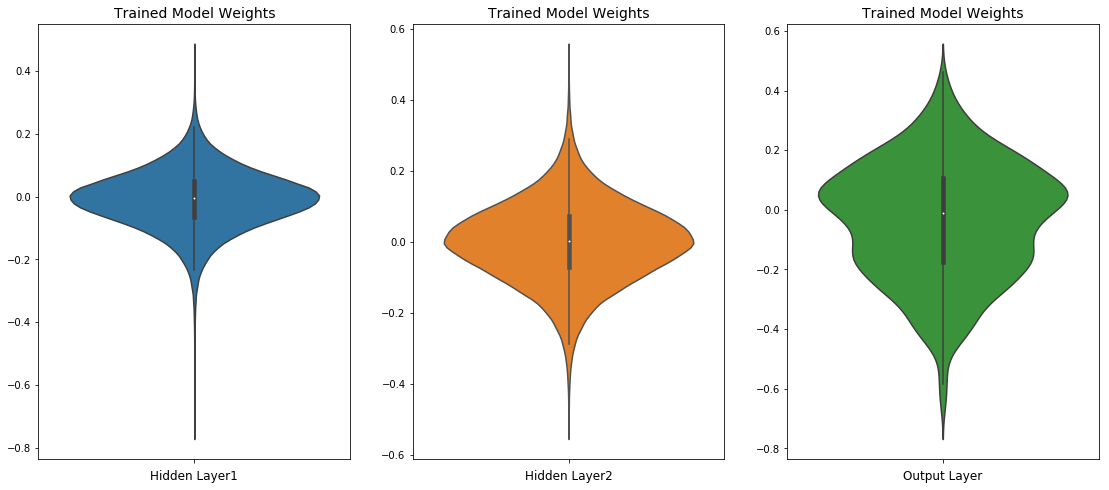

In [6]:
weight_plot(model_2, hidden_layers = 2, name = '')

Test score: 0.11799482354817753
Test accuracy: 0.9795





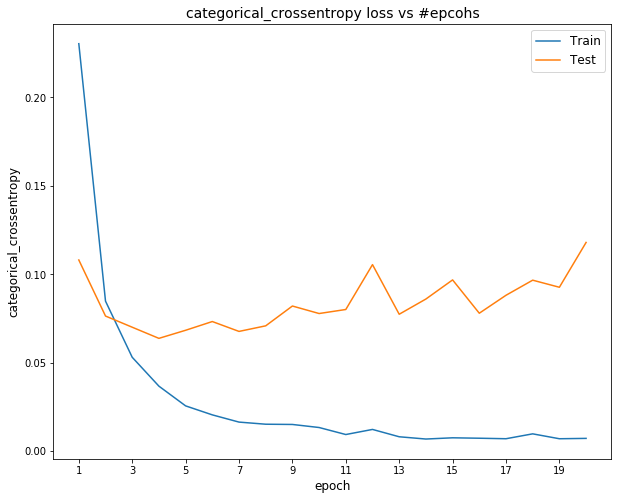

In [7]:
score = report_model(model_2, history, X_test, Y_test, epochs= epochs)
x.add_row(['2-hidden layers', None, round(score[0],5), round(score[1], 5)])

## With BatchNomralization (only)

* Batch Normalization only on hidden layers.

In [8]:
model_2_BN = Sequential()
model_2_BN.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_2_BN.add(BatchNormalization())

model_2_BN.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_2_BN.add(BatchNormalization())

model_2_BN.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_2_BN.summary()

#compile it
model_2_BN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_2_BN.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s

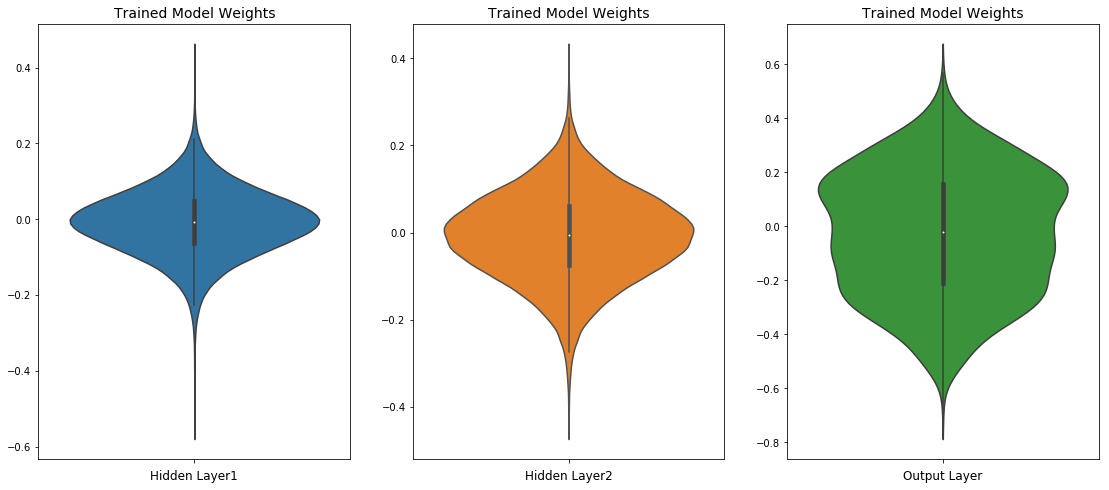

In [9]:
weight_plot(model_2_BN, hidden_layers = 2, name = 'BN')

Test score: 0.08468211864497643
Test accuracy: 0.9801





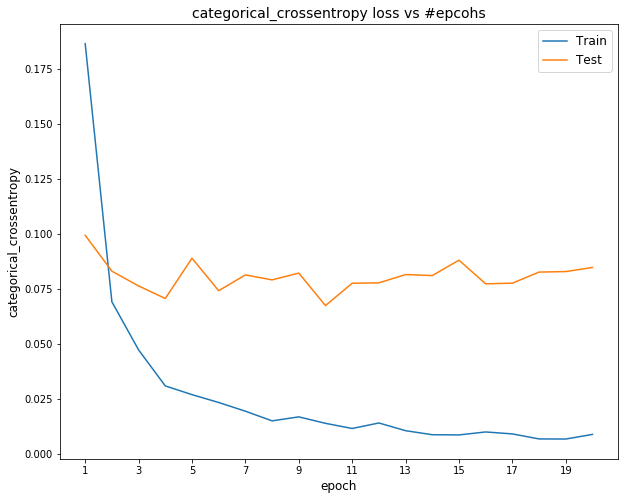

In [10]:
score = report_model(model_2_BN, history, X_test, Y_test, epochs= epochs)
x.add_row(['2-hidden layers', "BN", round(score[0],5), round(score[1], 5)])

## With Dropout (only)

In [11]:
model_2_drop = Sequential()

model_2_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_2_drop.add(Dropout(0.5))

model_2_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_2_drop.add(Dropout(0.5))

model_2_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_2_drop.summary()

#compile it
model_2_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_2_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

W0906 15:02:10.383067 140679911057280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44u

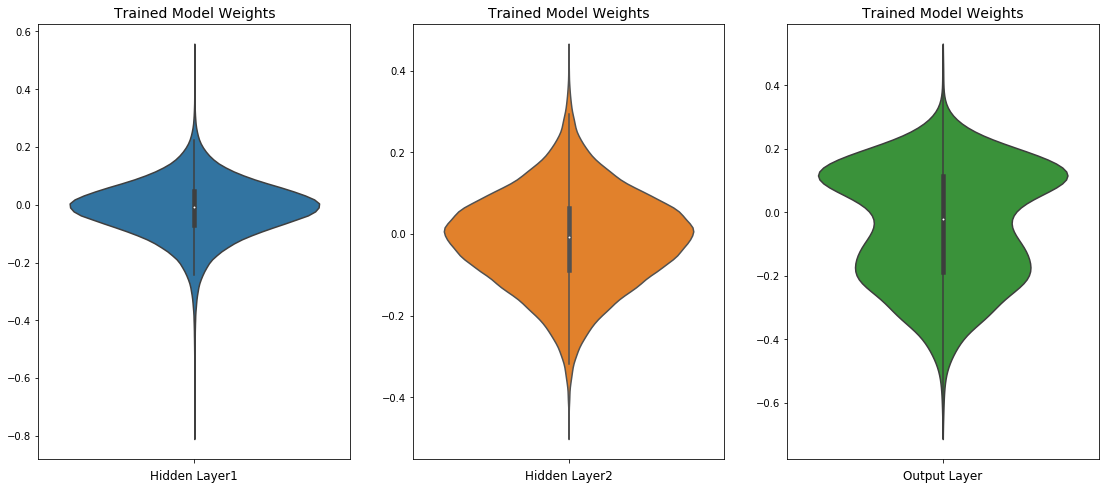

In [12]:
weight_plot(model_2_drop, hidden_layers = 2, name = 'drop')

Test score: 0.062311452490313966
Test accuracy: 0.9838





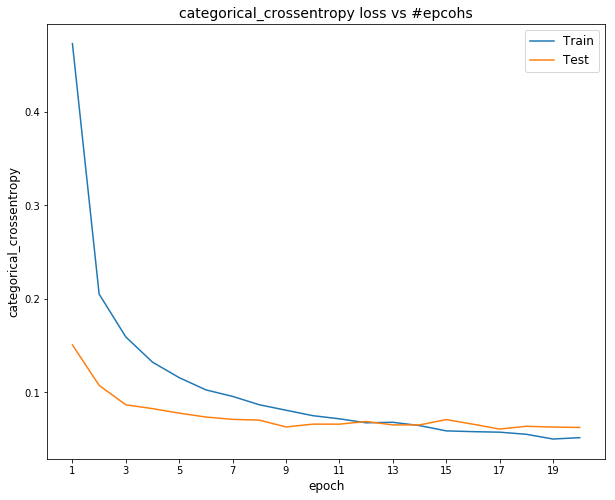

In [13]:
score = report_model(model_2_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['2-hidden layers', "Dropout", round(score[0],5), round(score[1], 5)])

## With BatchNomralization + Dropout

In [14]:
model_2_BN_drop = Sequential()

model_2_BN_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_2_BN_drop.add(BatchNormalization())
model_2_BN_drop.add(Dropout(0.5))

model_2_BN_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_2_BN_drop.add(BatchNormalization())
model_2_BN_drop.add(Dropout(0.5))

model_2_BN_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_2_BN_drop.summary()

#compile it
model_2_BN_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_2_BN_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

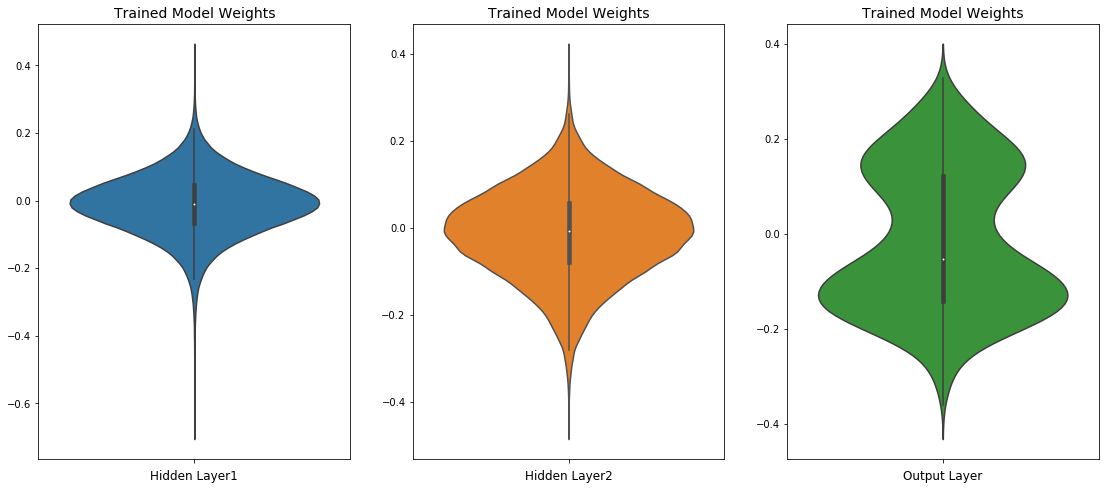

In [15]:
weight_plot(model_2_BN_drop, hidden_layers = 2, name = 'BN+drop')

Test score: 0.06082183362209471
Test accuracy: 0.9816





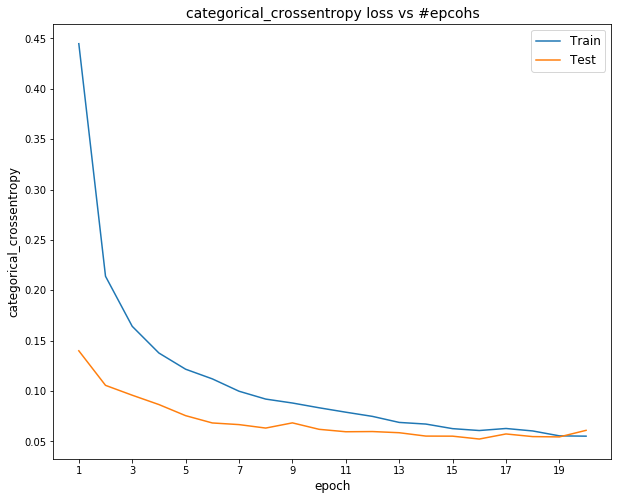

In [16]:
score = report_model(model_2_BN_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['2-hidden layers', 'BN+Dropout', round(score[0],5), round(score[1], 5)])

# With 3-hidden layers (Model_3)

* There will be total 5-layer (3:hidden + 1:output + 1:input)

In [0]:
n_inputs         = X_train.shape[1]
n_hidden_units_1 = 512
n_hidden_units_2 = 256
n_hidden_units_3 = 128
out_hidden_units = 10

## Simple (Fully Connected)

In [18]:
model_3 = Sequential()
model_3.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_3.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_3.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_3.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_3.summary()

#compile it
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_3.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2176 - acc: 0.9350 - val_loss: 0.1153 - val_acc: 0.9639
Epoch 2/20
60000/60000 [==============================] - 2

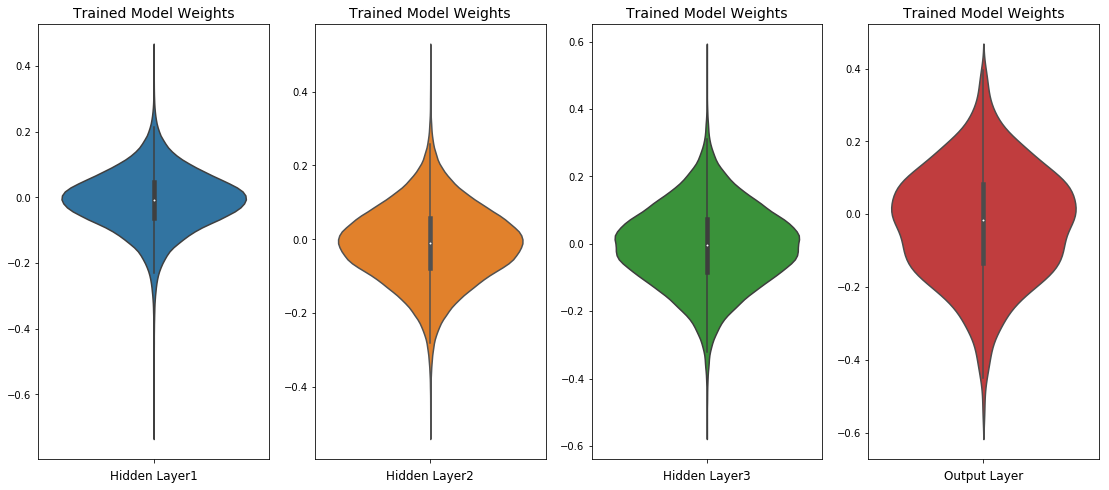

In [19]:
weight_plot(model_3, hidden_layers = 3, name = '')

Test score: 0.08029657997420295
Test accuracy: 0.9832





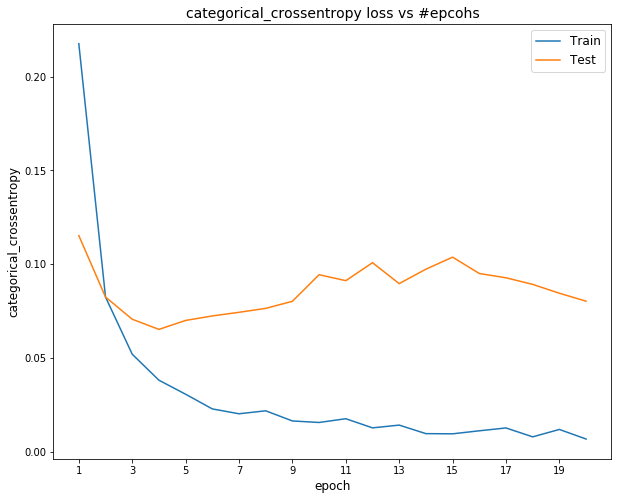

In [20]:
score = report_model(model_3, history, X_test, Y_test, epochs= epochs)
x.add_row(['3-hidden layers', None, round(score[0],5), round(score[1], 5)])

## With BatchNomralization (only)

* Batch Normalization only on hidden layers.

In [21]:
model_3_BN = Sequential()
model_3_BN.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_3_BN.add(BatchNormalization())

model_3_BN.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_3_BN.add(BatchNormalization())

model_3_BN.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_3_BN.add(BatchNormalization())

model_3_BN.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_3_BN.summary()

#compile it
model_3_BN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_3_BN.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

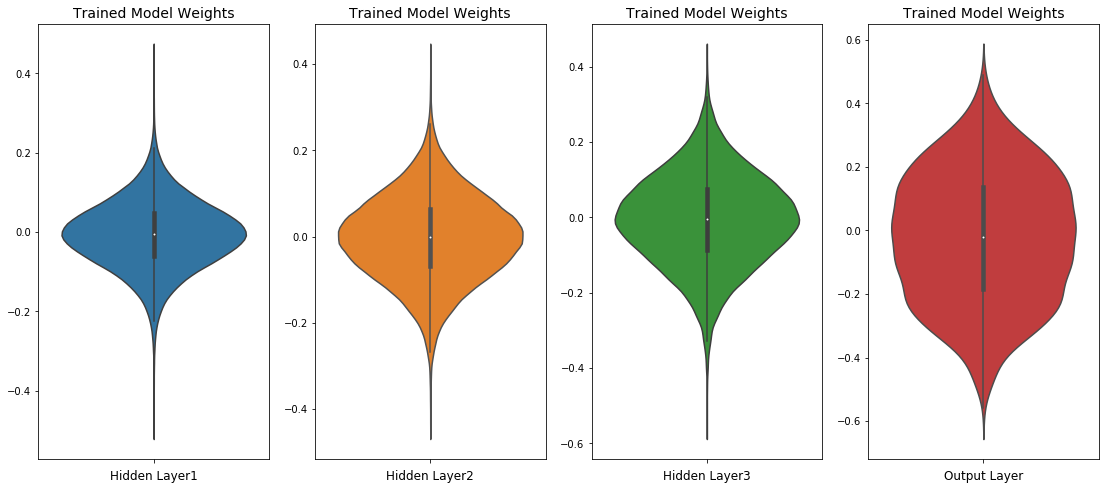

In [22]:
weight_plot(model_3_BN, hidden_layers = 3, name = 'BN')

Test score: 0.07882153950197207
Test accuracy: 0.98





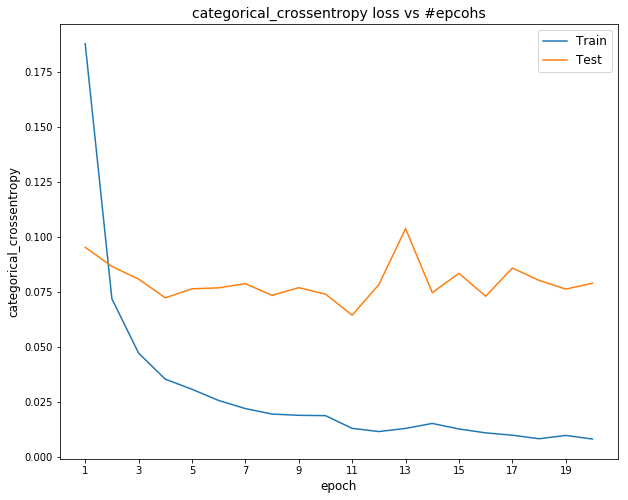

In [23]:
score = report_model(model_3_BN, history, X_test, Y_test, epochs= epochs)
x.add_row(['3-hidden layers', 'BN', round(score[0],5), round(score[1], 5)])

## With Dropout (only)

In [24]:
model_3_drop = Sequential()

model_3_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_3_drop.add(Dropout(0.5))

model_3_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_3_drop.add(Dropout(0.5))

model_3_drop.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_3_drop.add(Dropout(0.5))

model_3_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_3_drop.summary()

#compile it
model_3_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_3_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

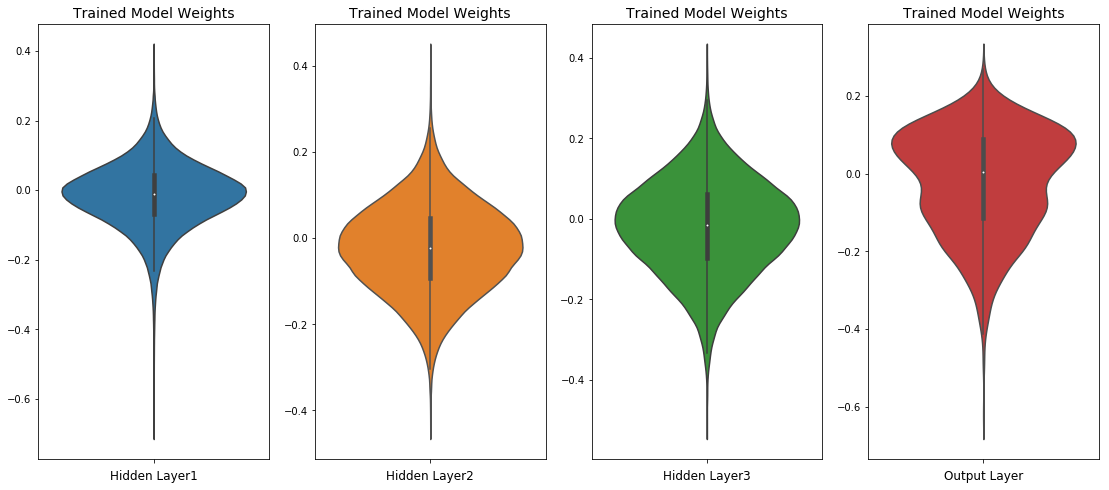

In [25]:
weight_plot(model_3_drop, hidden_layers = 3, name = 'drop')

Test score: 0.06368936862212494
Test accuracy: 0.9833





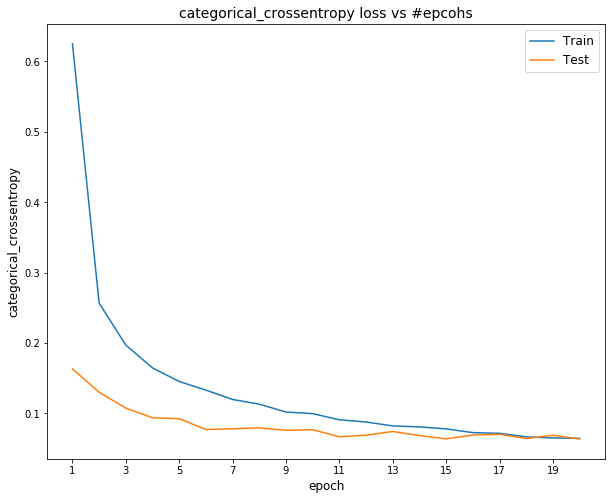

In [26]:
scroe = report_model(model_3_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['3-hidden layers', 'Dropout', round(score[0],5), round(score[1], 5)])

## With BatchNomralization + Dropout

In [27]:
model_3_BN_drop = Sequential()

model_3_BN_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_3_BN_drop.add(BatchNormalization())
model_3_BN_drop.add(Dropout(0.5))

model_3_BN_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_3_BN_drop.add(BatchNormalization())
model_3_BN_drop.add(Dropout(0.5))

model_3_BN_drop.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_3_BN_drop.add(BatchNormalization())
model_3_BN_drop.add(Dropout(0.5))

model_3_BN_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_3_BN_drop.summary()

#compile it
model_3_BN_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_3_BN_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

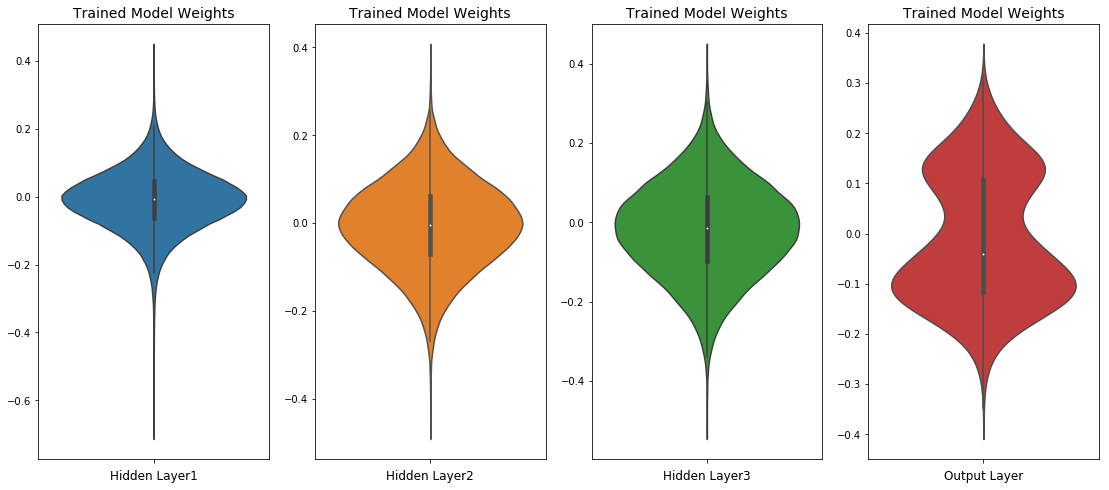

In [28]:
weight_plot(model_3_BN_drop, hidden_layers = 3, name = 'BN+drop')

Test score: 0.05874173860428273
Test accuracy: 0.983





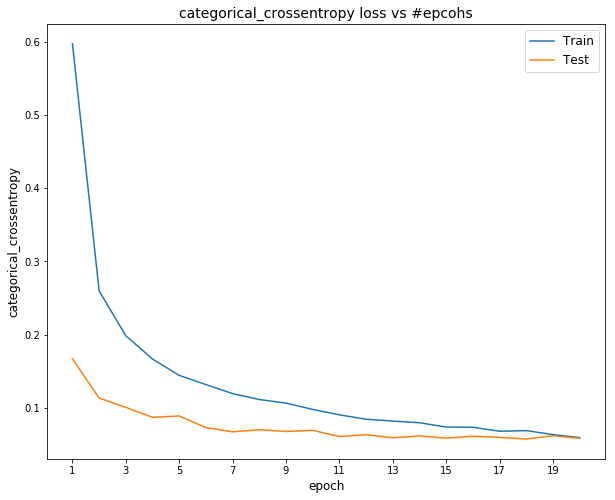

In [29]:
score = report_model(model_3_BN_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['3-hidden layers', 'BN+Dropout', round(score[0],5), round(score[1], 5)])

# With 5-hidden layers (Model_5)

* There will be total 7-layer (5:hidden + 1:output + 1:input)

In [0]:
n_inputs         = X_train.shape[1]
n_hidden_units_1 = 512
n_hidden_units_2 = 256
n_hidden_units_3 = 128
n_hidden_units_4 = 64
n_hidden_units_5 = 32
out_hidden_units = 10

## Simple (Fully Connected)

In [31]:
model_5 = Sequential()
model_5.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_5.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_5.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_5.add(Dense(n_hidden_units_4, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_5.add(Dense(n_hidden_units_5, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_4), seed = 1)))
model_5.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_5), seed = 1)))
model_5.summary()

#compile it
model_5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_5.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

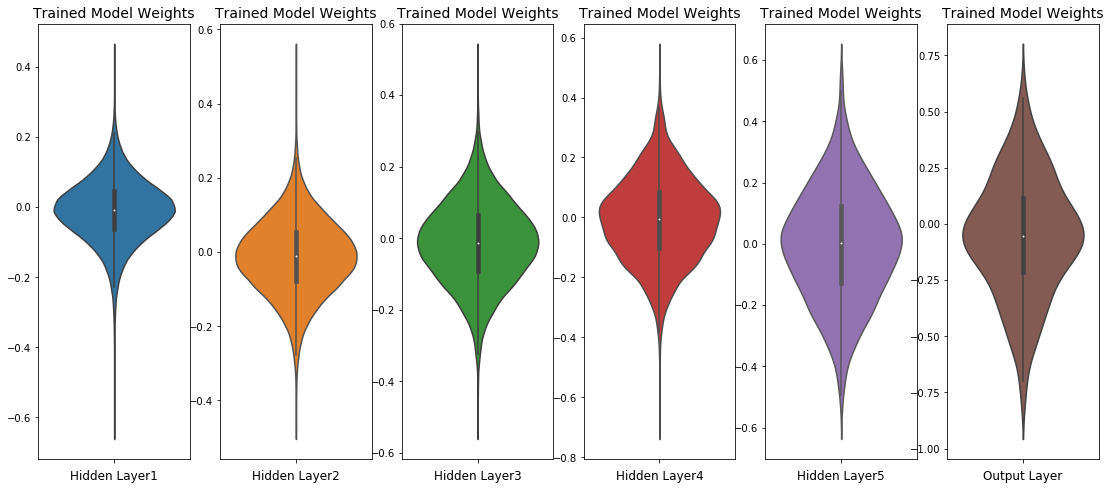

In [32]:
weight_plot(model_5, hidden_layers = 5, name = '')

Test score: 0.09466038714095962
Test accuracy: 0.9799





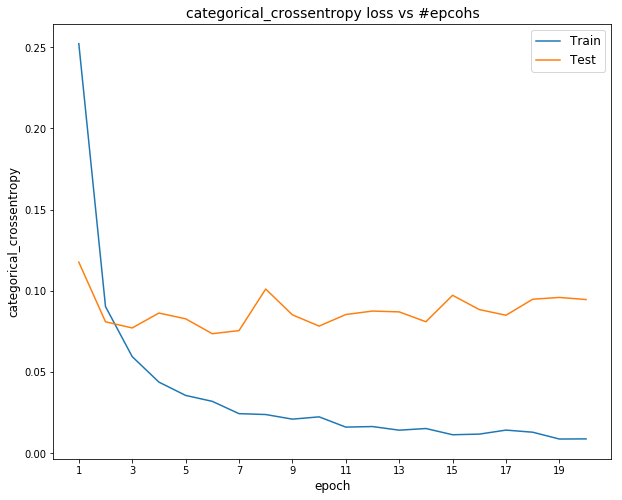

In [33]:
score = report_model(model_5, history, X_test, Y_test, epochs= epochs)
x.add_row(['5-hidden layers', None, round(score[0],5), round(score[1], 5)])

## With BatchNomralization (only)

* Batch Normalization only on hidden layer.

In [34]:
model_5_BN = Sequential()
model_5_BN.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_5_BN.add(BatchNormalization())

model_5_BN.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_5_BN.add(BatchNormalization())

model_5_BN.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_5_BN.add(BatchNormalization())

model_5_BN.add(Dense(n_hidden_units_4, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_5_BN.add(BatchNormalization())

model_5_BN.add(Dense(n_hidden_units_5, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_4), seed = 1)))
model_5_BN.add(BatchNormalization())

model_5_BN.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_5), seed = 1)))
model_5_BN.summary()

#compile it
model_5_BN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_5_BN.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dense_38 (Dense)             (None, 64)              

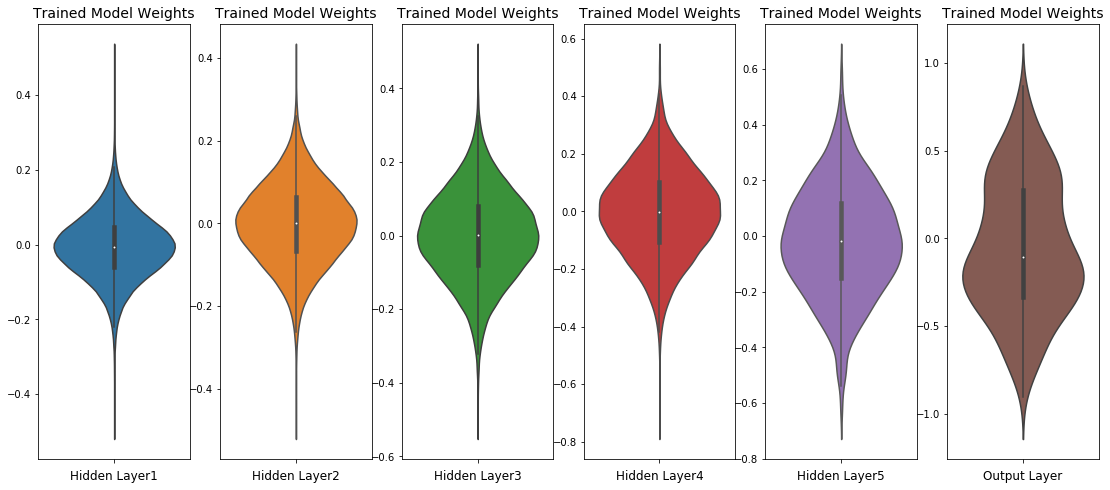

In [35]:
weight_plot(model_5_BN, hidden_layers = 5, name = 'BN')

Test score: 0.0729884449402627
Test accuracy: 0.9802





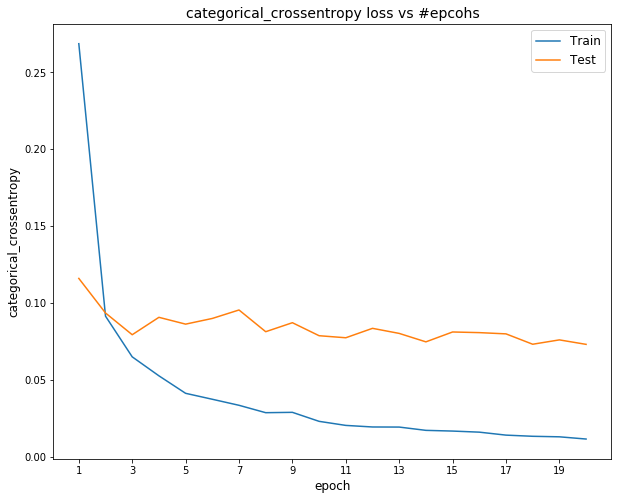

In [36]:
score = report_model(model_5_BN, history, X_test, Y_test, epochs= epochs)
x.add_row(['5-hidden layers', 'BN', round(score[0],5), round(score[1], 5)])

## With Dropout (only)

In [37]:
model_5_drop = Sequential()

model_5_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_5_drop.add(Dropout(0.5))

model_5_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_5_drop.add(Dropout(0.5))

model_5_drop.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_5_drop.add(Dropout(0.5))

model_5_drop.add(Dense(n_hidden_units_4, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_5_drop.add(Dropout(0.5))

model_5_drop.add(Dense(n_hidden_units_5, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_4), seed = 1)))
model_5_drop.add(Dropout(0.5))

model_5_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_5), seed = 1)))
model_5_drop.summary()

#compile it
model_5_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_5_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)              

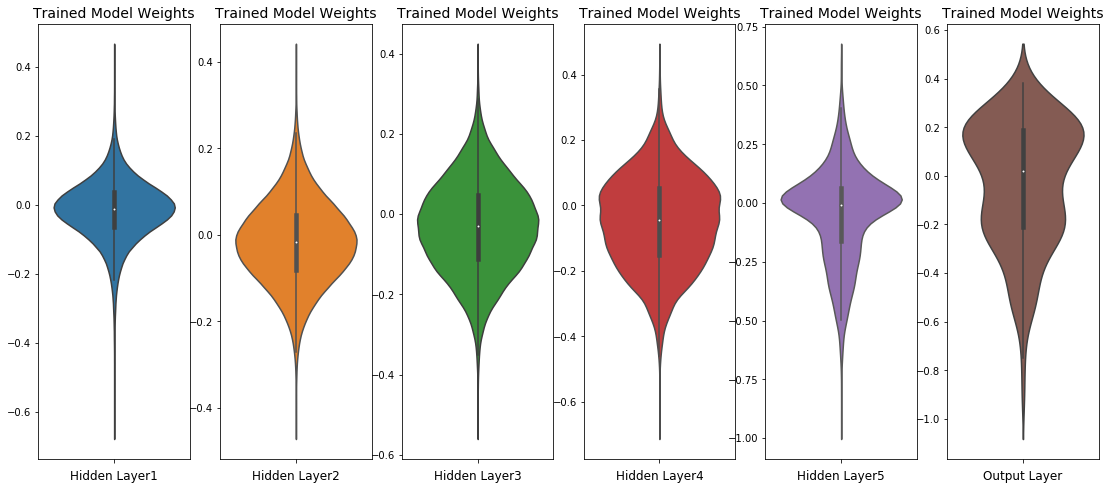

In [38]:
weight_plot(model_5_drop, hidden_layers = 5, name = 'drop')

Test score: 0.14382897546738385
Test accuracy: 0.9744





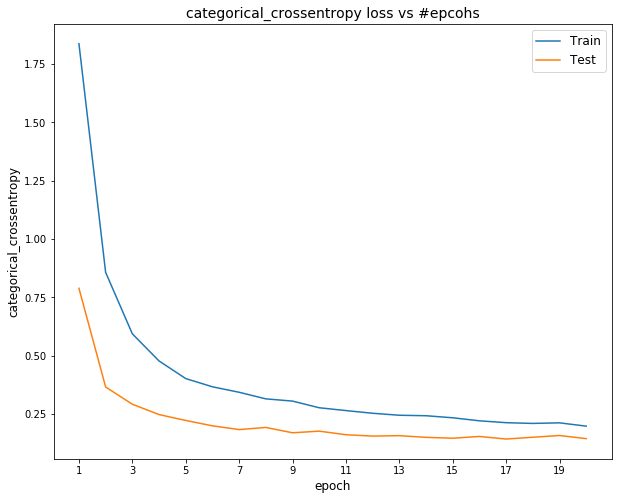

In [39]:
score = report_model(model_5_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['5-hidden layers', 'Dropout', round(score[0],5), round(score[1], 5)])

## With BatchNomralization + Dropout

In [40]:
model_5_BN_drop = Sequential()

model_5_BN_drop.add(Dense(n_hidden_units_1, input_dim = n_inputs, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_inputs), seed = 1)))
model_5_BN_drop.add(BatchNormalization())
model_5_BN_drop.add(Dropout(0.5))

model_5_BN_drop.add(Dense(n_hidden_units_2, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_1), seed = 1)))
model_5_BN_drop.add(BatchNormalization())
model_5_BN_drop.add(Dropout(0.5))

model_5_BN_drop.add(Dense(n_hidden_units_3, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_2), seed = 1)))
model_5_BN_drop.add(BatchNormalization())
model_5_BN_drop.add(Dropout(0.5))

model_5_BN_drop.add(Dense(n_hidden_units_4, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_3), seed = 1)))
model_5_BN_drop.add(BatchNormalization())
model_5_BN_drop.add(Dropout(0.5))

model_5_BN_drop.add(Dense(n_hidden_units_5, activation = 'relu', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_4), seed = 1)))
model_5_BN_drop.add(BatchNormalization())
model_5_BN_drop.add(Dropout(0.5))

model_5_BN_drop.add(Dense(out_hidden_units, activation = 'softmax', 
                  kernel_initializer = RandomNormal(mean = 0, stddev = np.sqrt(2/n_hidden_units_5), seed = 1)))
model_5_BN_drop.summary()

#compile it
model_5_BN_drop.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_5_BN_drop.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)             

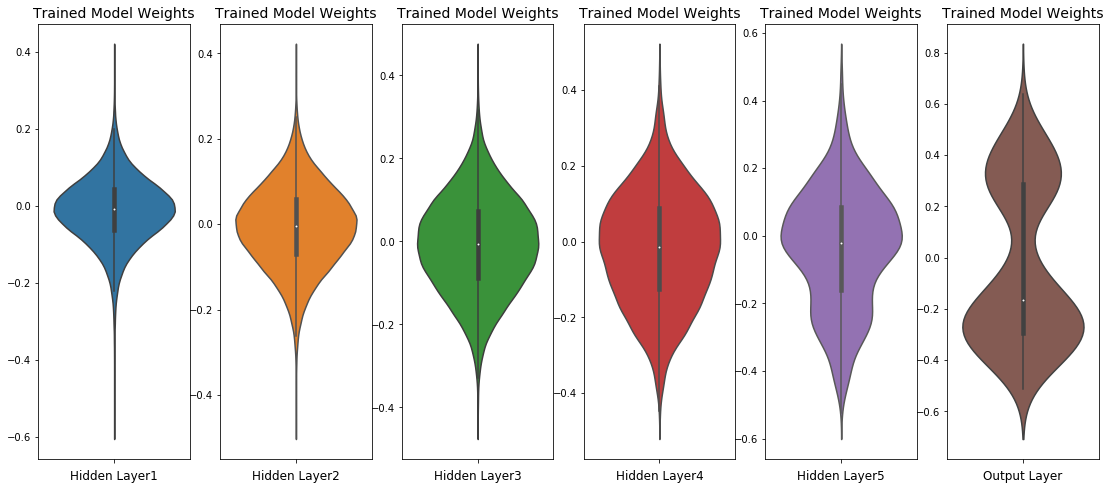

In [41]:
weight_plot(model_5_BN_drop, hidden_layers = 5, name = 'BN+drop')

Test score: 0.0746277769310167
Test accuracy: 0.982





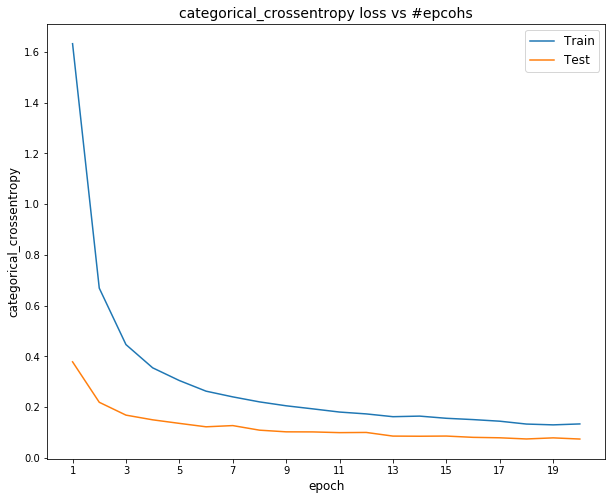

In [42]:
score = report_model(model_5_BN_drop, history, X_test, Y_test, epochs= epochs)
x.add_row(['5-hidden layers', 'BN+Dropout', round(score[0],5), round(score[1], 5)])

# Conclusion

**Summary**
* There are various architecture (with 2,3, and 5 hidden layers) of neural network has been tried. Each of them has been tried with batch normalization (alone), dropout (alone) and both (batch normalization + dropout). 
* In below table performance of each model has been compared. And it can be seen that when depth is increasing test loss and test accuracy is improving.
* In both 2 and 3 hidden layers architecture can be seen that model performance is improving when batch-normalization, dropout or both is applied. 
* Prefer batch-normalization and dropout both for  any architecture becasue **BN+Dropout** giving very good accuracy and lowest loss for all architecture.
* From table it can be seen that the performance of the model with ***5-hidden layers and dropout*** is reducing. So use both **BN** and **dropout** for **MLP**.


In [43]:
print(x)

+-----------------+----------------+-----------+---------------+
|   Architecture  | Regularization | Test Loss | Test Accuracy |
+-----------------+----------------+-----------+---------------+
| 2-hidden layers |      None      |  0.11799  |     0.9795    |
| 2-hidden layers |       BN       |  0.08468  |     0.9801    |
| 2-hidden layers |    Dropout     |  0.06231  |     0.9838    |
| 2-hidden layers |   BN+Dropout   |  0.06082  |     0.9816    |
| 3-hidden layers |      None      |   0.0803  |     0.9832    |
| 3-hidden layers |       BN       |  0.07882  |      0.98     |
| 3-hidden layers |    Dropout     |  0.07882  |      0.98     |
| 3-hidden layers |   BN+Dropout   |  0.05874  |     0.983     |
| 5-hidden layers |      None      |  0.09466  |     0.9799    |
| 5-hidden layers |       BN       |  0.07299  |     0.9802    |
| 5-hidden layers |    Dropout     |  0.14383  |     0.9744    |
| 5-hidden layers |   BN+Dropout   |  0.07463  |     0.982     |
+-----------------+------